## Can we be better informed about Airbnb listing prices in New York city from data acquired in 2019?

1) The problem/decision<br>
The main purpose of our analysis was to make price predictions of an Airbnb listing given Airbnb listings in new york, using features of relevance in an Airbnb listing. These features can be either numeric or categorical in nature and can partain to phycial attributes such as the location and type of room of a listing or to characteristics of the posting on the Airbnb web platform such as the words used in the title or minimum number of nights that guests are required to stay to be eligible to book for a stay.
<br><br>
The purpose of our machine learning models were two-fold. The first was to enable an data-driven platform in which hosts can input certain characteristics of their Airbnb listing, such as the number of days in he year it is available, the roomtype and the neighbourhood, to help them determine the optimal price to set for their listing. To put our model to test, we will use our best performing model to predict the price of this a listing given a pre-determined set of features as input based on the trends analyzed in past data on listing prices. The second purpose is to help existing hosts know which factors of their Airbnb listing is the most or least significant in determining the price of their listing. To see how hosts may use the model to their benefit, we will show which features of an Airbnb listing are important in predicting the target label (i.e. price). Because our target label is continous in nature without a pre-existing set of unique categories, our problem is a regression problem and we are using three linear machine learning models to gain insight on the provided dataset. The dataset was obtained from an open source platform called Kaggle providing data across multiple domains for multiple uses to the general public. Our dataset can be obtained from [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data).

2) Description of the dataset and outlier detection: <br>
The dataset contains about ~48,895 Airbnb listings in New York as of 2019. These samples were divided into a test set comprising of only 10% of the data while 68% of the given data was used to train three models. The data contains missing values for listing features that were not recorded or obtained during collection. In particular information such as `last_review` and  `reviews_per_month` were missing sgnficantly for a large portion of the Airbnb listings. In order to resolve this problem of missing fields, we replaced missing fields with the median value in a column with numbers and with the most frequently ocurring value in a column that comprises of categories of values.

An important aspect of the dataset was that intuitevly, some features such as: `id`, `host_id` and `host_name` were irrelevant for our model predictions. The reason for this is that these three fields were unique for almost every Airbnb listing and had high cardinality thus, we felt it not necessary to include in our model, which would otherwise be distorted when finding patterns between each of these three fields and price. Additionally, the field `last_review`, accounting for the last date a review for the listing was made, was also disregarded in our model firsty because it contained many missing values and secondly, we did not not have the time to find a way to efficiently preprocess this field before providing it as input to our model. Date-time information and standardizing date-time formats across examples is generally a difficult task. Perhaps this field can be incorporated into our model in the future once an efficient method to preprocess the datetime exists. 

Lastly, some features are highly correlated with each other while some show bare minimum relation in influencing each other. In particular, `number_of_reviews` and `reviews_per_month` were significantly correlated to each other as indicated by the Pearson's r correlation below:

![Pearson_r_correlation.png](./Pearson_r_correlation.png)
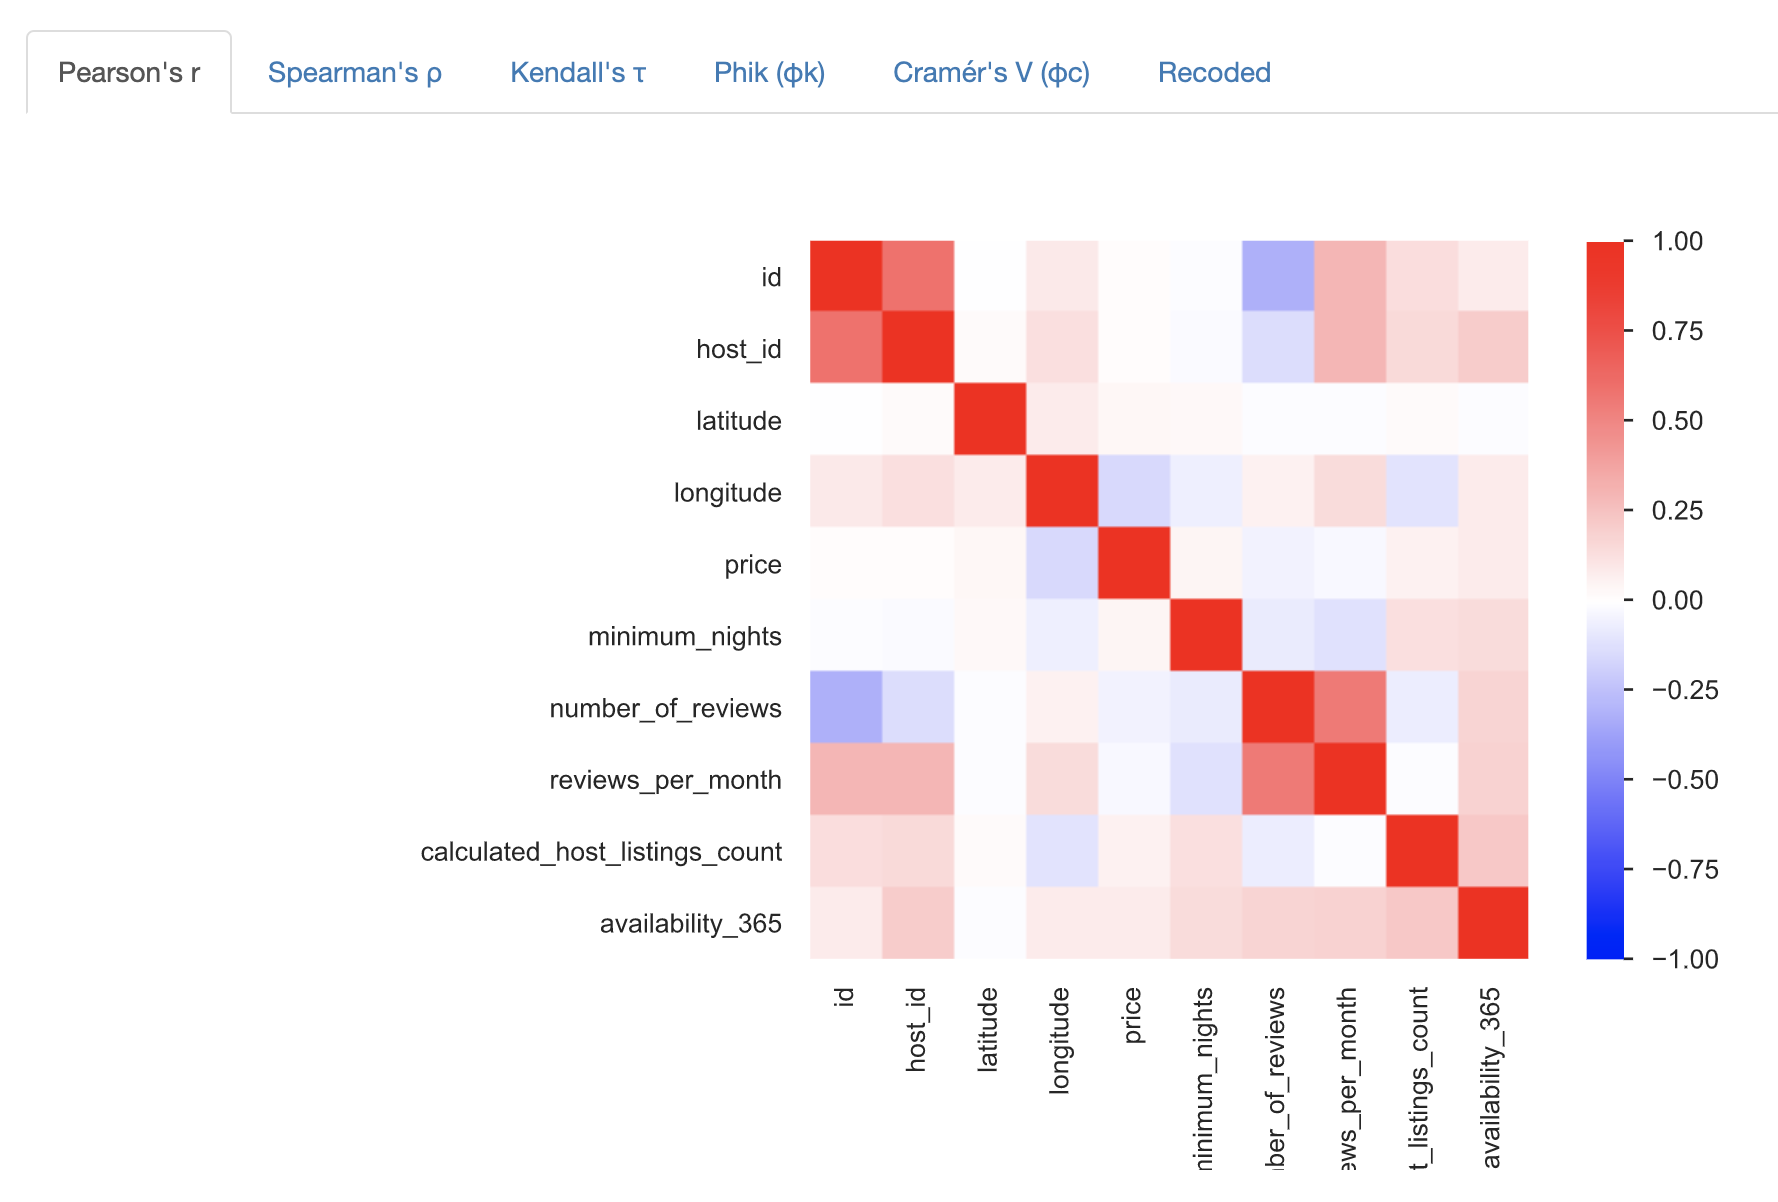

In the correlation matrix above, the most red or blue a square, the more positive or negative the correlation respectively between the two corresponding features. The red box between `number_of_reviews` `reviews_per_month` shows a red box with a positive correlation of around ~0.65. If two fields are highly correlated with each other, it is good practice to disregard either of the fields in the ML model that shows the least correlation with the target label. We decided to disregard `number_of_reviews` in our model because `reviews_per_month` already took into account the total number of reviews of a listing.

The matrix above also provides an extremely simplistic 'at first glance' approach to tell us the relationship between all features in our data. At first glance, two things can be noticed. One is that the loction of a listing, particularly `longitude`, already has a visible negative correlation with `price`, which implies that this feature will be singficiant in price predictions; we will revisit feature importances in the later sections of this post. Second is that price, in general, is not signficantly correalated to any of the other features (seen by the white-dominant column for price), suggesting that this may be a hard target to predict by the model due to lack of any existing straightforward visible relations with price in the dataset.

In terms of outliers, we thought it to be interesting to look at the different Airbnb listing prices to check any overly expensive Airbnb listings or overly cheap ones. According to our exploration, after scaling the price value to be squeezed between 0 and 1, 95% of the price values happen to be under 0.036 scaled. When converted to actual price, this is equivalent to 360. The maximum unscaled price of a listing is 10,000. This is an outlier out of the many outliers in the dataset. The figure below shows some specific listings with price values on the extereme high end:

![extreme_max_outliers.png](./extreme_max_outliers.png)
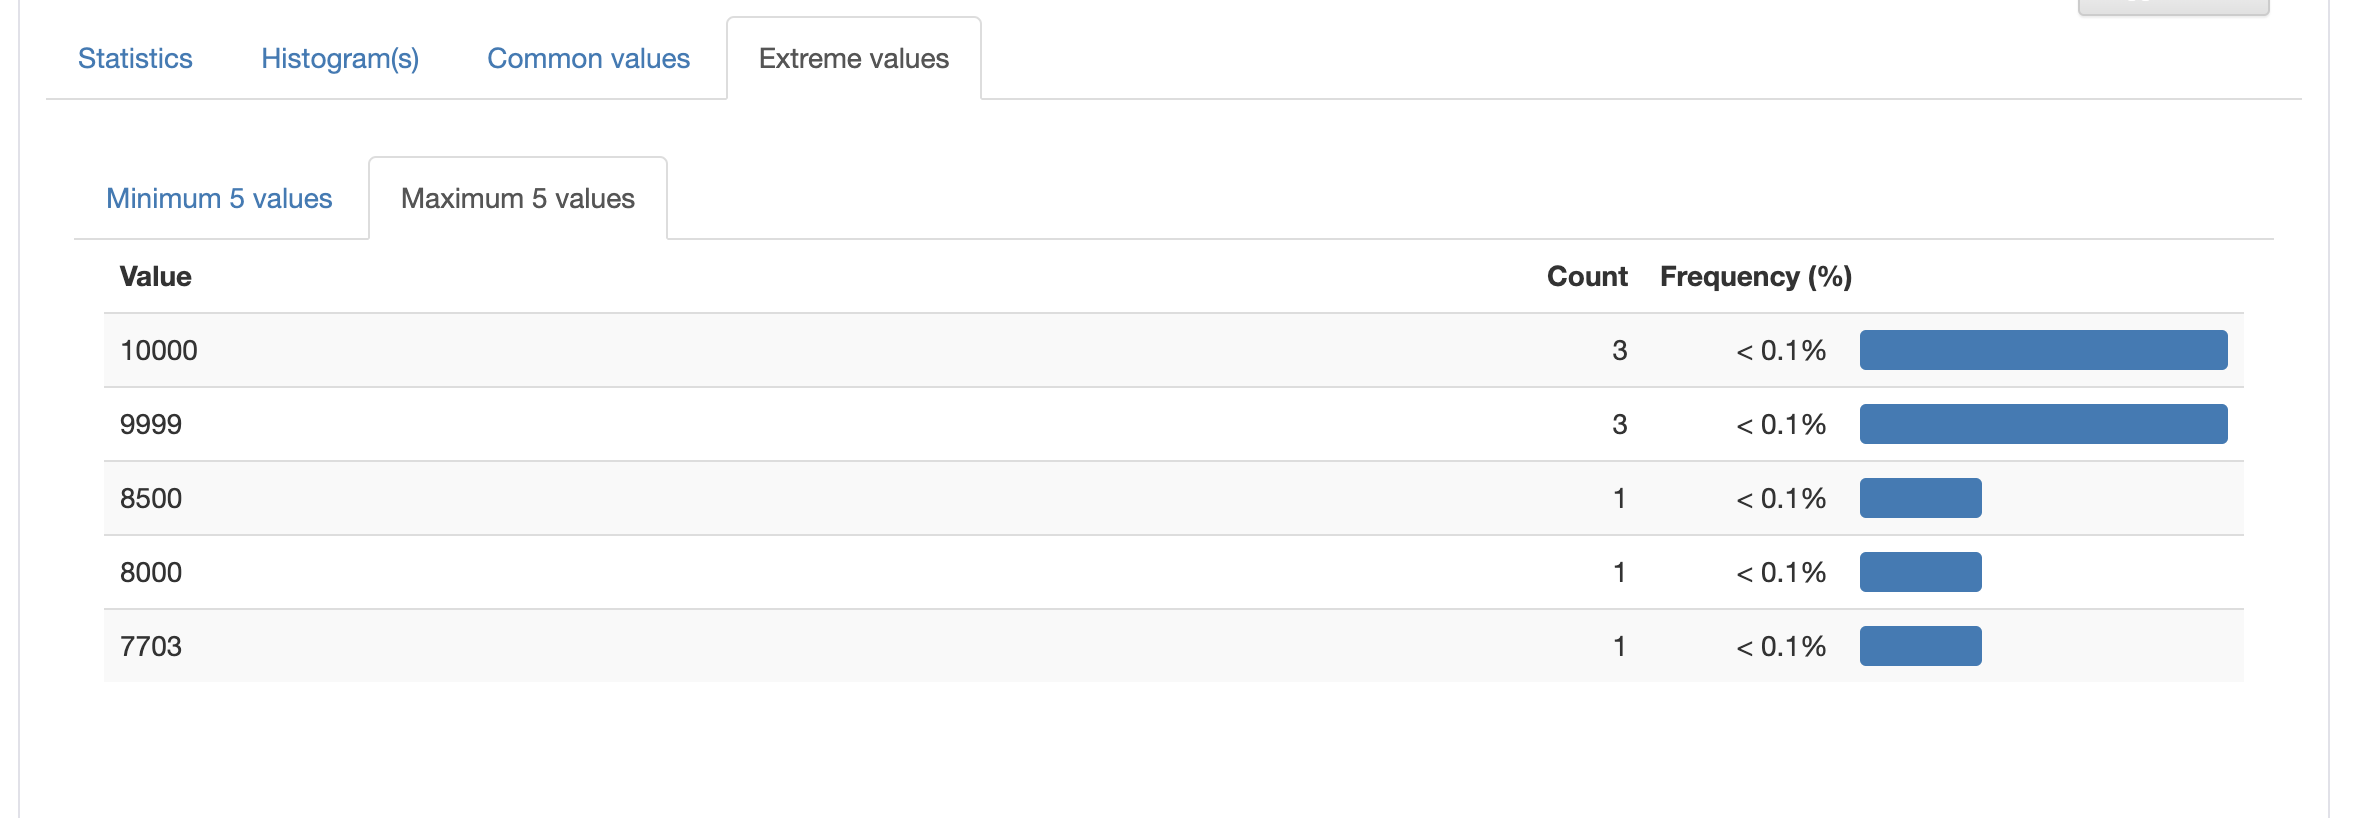

We also explored ways in which an unsupervised learning method can be used to help us determine outlier data points when looking at the relationship between minimum_nights of stay a listing is stated for and the price of the listing. This ML method clusters data points across these two numeric variable features based on a minimum density of points required for a group of points to be part of the same cluster. This could help guide new hosts and help tell us if there actually exists a relationship between these two variables and if so, how strong it is, based on the proportion of outliers:

![DBSCAN_outlier_plot.png](./DBSCAN_outlier_plot.png)
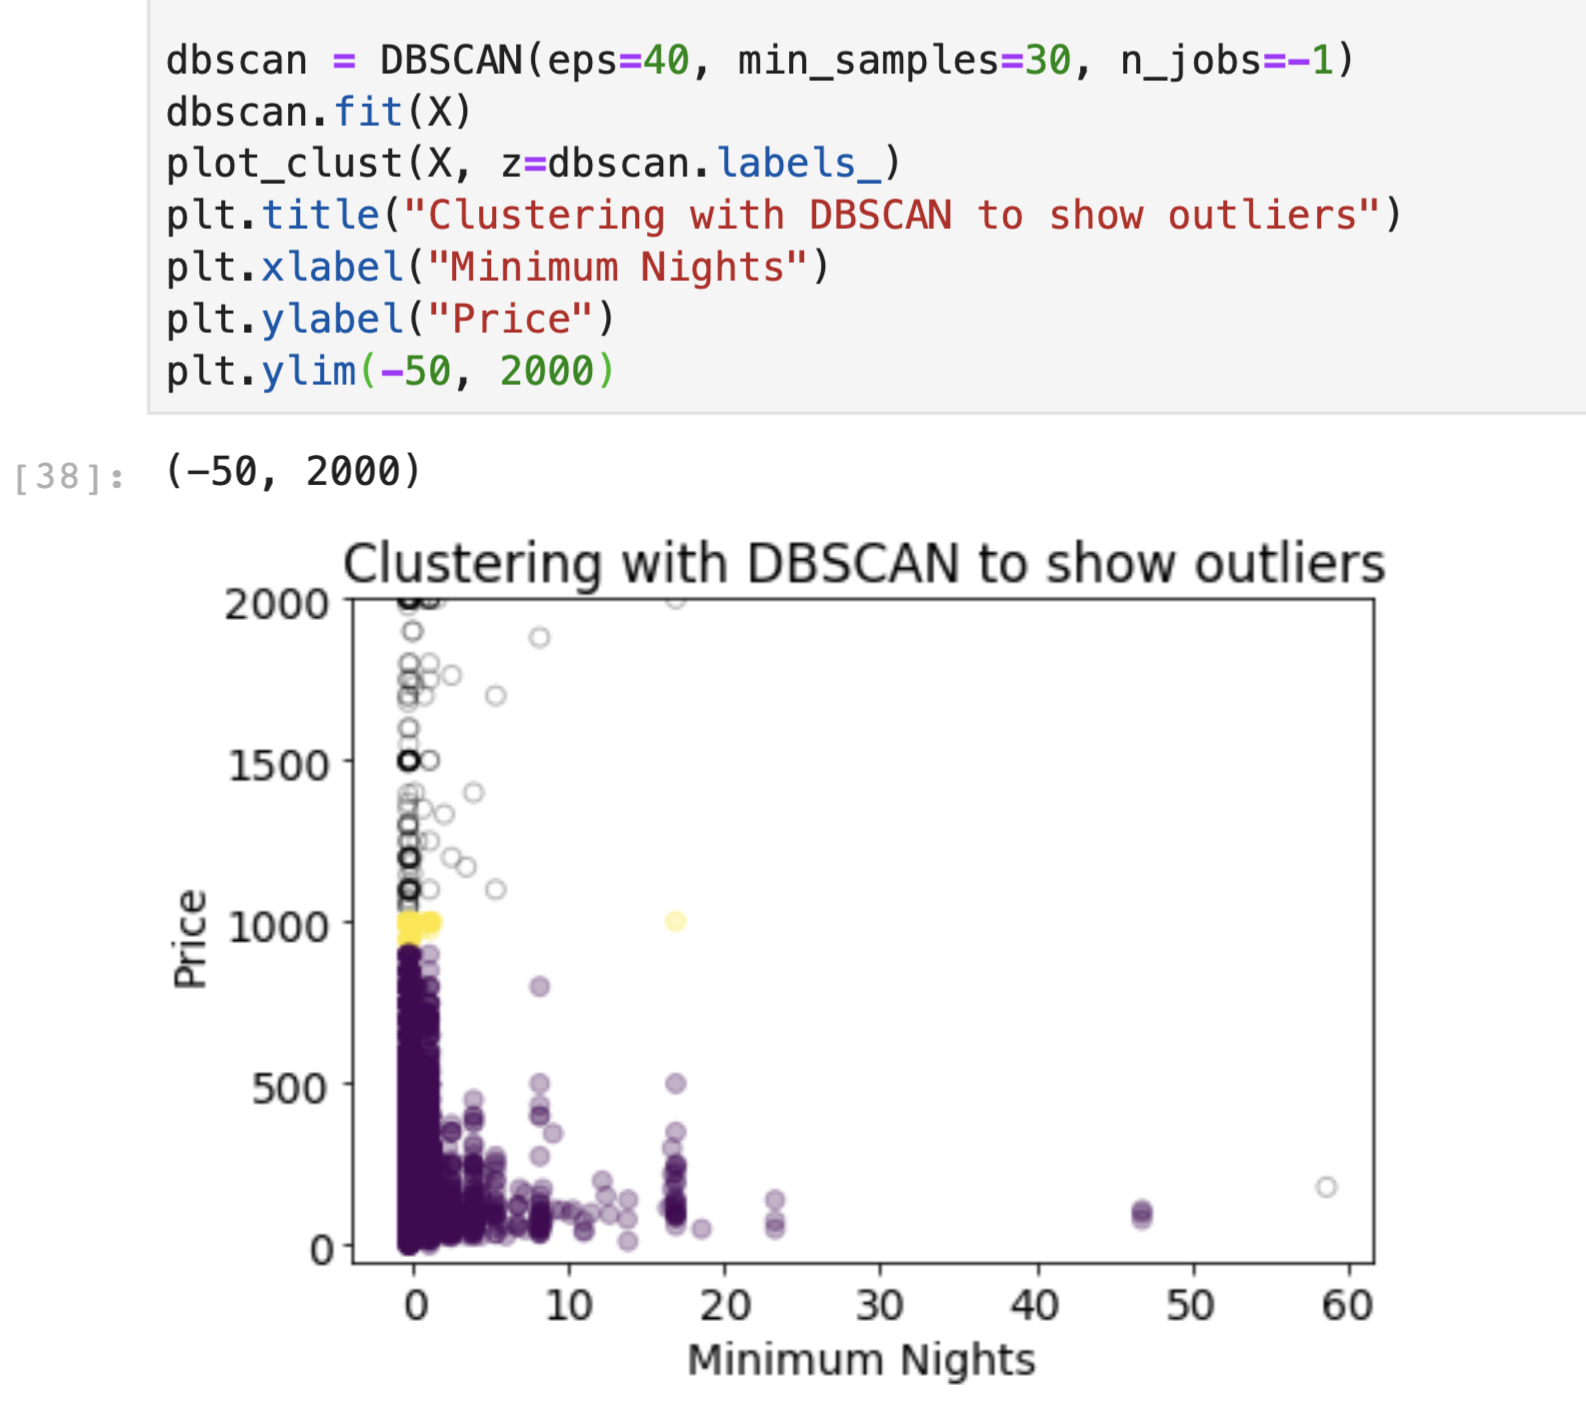

The plot above marks each data point plotted on a 2D plane featuring minimum_nights and price. There are several small clusters in the bottom-left corner highlighting the pattern that shorter minimum number of nights available for stay for a listing can potentially result into lower prices. Yet, there are a signficant number of outliers pointed by the hollow dots, showing that some luxurious listings can have a high price despite the minimum number of nights for these locations being low. Each cluster highlighted by the unsupervised model is a group clustered by the density of neighbouring data points. The two major clusters are dark blue which have low values for both features while the yellow cluster comprises of listings with similarly low minimum nights but a higher price (perhaps indicating the more luxurious listing locations). The large number of hollow outliers indicate that this dataset was very variable in nature in terms of price ranges ranging from the ~10 per night up to ~2000+ per night. As a result of the large range, the dataset contains clusters of points high in density as well as clusters of luxurious, more expensive listings, the points of which are less densely clustered and therefore, not captured by the DBSCAN model as a cluster. However, such small high-price and low min-nights clusters could exist if the model's density parameters are adjusted: the minimum density that the model accepts for a group of points to be a cluster should be less constrained.

3) Describing the model:
- Firstly, we had to tune certain parameters of our model to take into account the optimal complexity of the model. Optimizing our model parameters also allows us to control how tigtly the model fits to the training set and how well it can generalize its predictions to new incoming samples of data (i.e. new Airbnb listings).
- In addition, the feature columns presented initially in the dataset also had to be processed and scaled appropritely. The reason for this is that it is important to scale numeric features in order for large numbers to not obscure the importance of small numbers. In addition, when each unique category in a feature like `room_type` is separated into binary columns with numeric values, it is easier for a ML model to interpret the data.
- Next, the actual machine learning models used performed VERY POORLY in making price predictions. The r2 score is a performance metric that tells us how much our model's predicted prices deviate away from the true market price label. The higher the r2 score, the less our model's price predictions deviates away from the actual known prices and the more performant it is.
- The performance of each of our models with this scoring metric is discussed in the section below. 

4) Description and analysis of our results: <br>
In terms of model performance, the summary of prediction scores are displayed in the table below:

| Machine Learning Model | Best Training Score/Accuracy | Best Testing Score/Accuracy|
|------------------------|------------------------------|----------------------------|
| DummyRegressor         |            0.000             | -0.000090                 |
| HuberRegressor         |            0.141             | 0.178                      |
| LGBMRegressor          | 0.363                     |0.247                       |

The baseline score achieved was 0.00008, which suggests that the dataset itself was very variant, thus making it harder for a model to capture trends, patterns and correlations between each respective feature and the price target. Our goal was to investigate other potential regression models to make price predictions and to produce a score above 0.00008. In comparison, another more performant model, performed a hundred-times better with a score of 0.178. Yet, this improvement is still massively different from an ideal score of above at least 0.60 for a model to be considered useful. Our best performing model, the LRGBMRegressor, scored 0.24, indicating that it was about 24% accurate in its price predictions. Below, we shall put our best model into test by passing in a new Airbnb listing and have our best performing model predict the price of this listing with a pre-determined set of features (which were randomly assigned):

![example_prediction.png](./example_prediction.png)
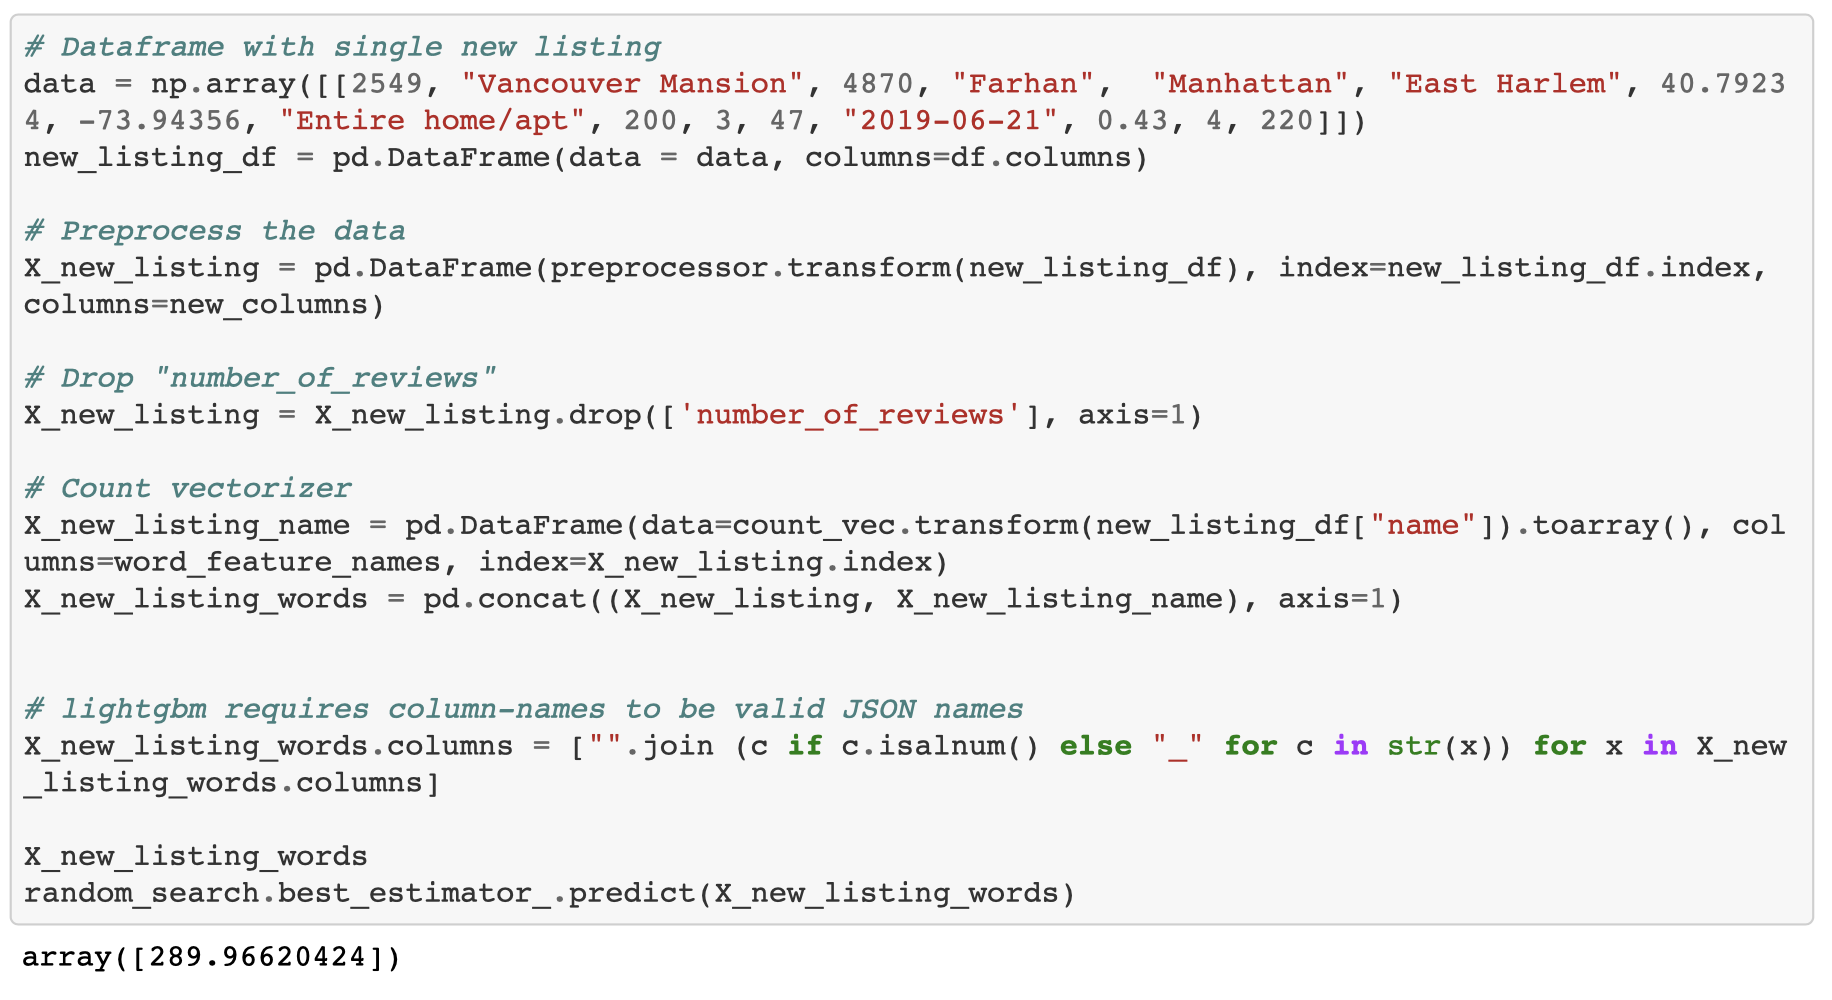

In the code above, we have created an example row containing all the fields represented in the model such as the title of the listing "Vancouver Mansion", the name of the host as well as the neighbourhood "East Harlem". The second liine puts the listing into a sample dataframe object which is taken as input by the preprocessor. The preprocesser is a model comprising of a set of transformations in that by calling its 'transform' function, we can transform the given example into the format of data that is required to be inputted into our model. The transformations are the same as discussed in the 'Describing the model' section above, which involve scaling numeric features, producing binary columns for unique categories within categorical columns and converting the `name` column into binary columns for the occurrence of each unique word in all the examples. After preprocessing the data and removing columns not necessary for price prediction (as shown above), we use our best performing model to predict for us the price of this new inputted Airbnb listing.  **The model's predicted price is ~289.97 US dollars.** This shows how a new host or an existing host with a new listing can directly use our model to get an estimate for the optimal price of their listing should he/she need some guidance based on Airbnb listings around the neighbourhood. It is important to note that regardless of whether a new host decides to estimate the price of his/her new listing initially or not, the model will be blind to this inputted estimated price because its predictions are primarily based on the set of features relevant in making the prediction, and the input price, which it itself is trying to predict, is irrelevant. In the example above, an input price of 200 US dollars per night is given to show what the new host initially had in mind for his/her listing but it turns out that based on existing pricing data, his estimate was an underestimate because the model shows that his/her listing should be ~90 dollars higher. Whether we changed this input price to 0 or 1000, the same result of 289 dollars is predicted by the model.

The second use of our model is such that an existing host in 2020 can determine, based on last year's New York Airbnb listings, what features seem to be the most important in regulating price changes. This is highlighted in the bar chart below:

![model_feature_importances.png](./model_feature_importances.png)
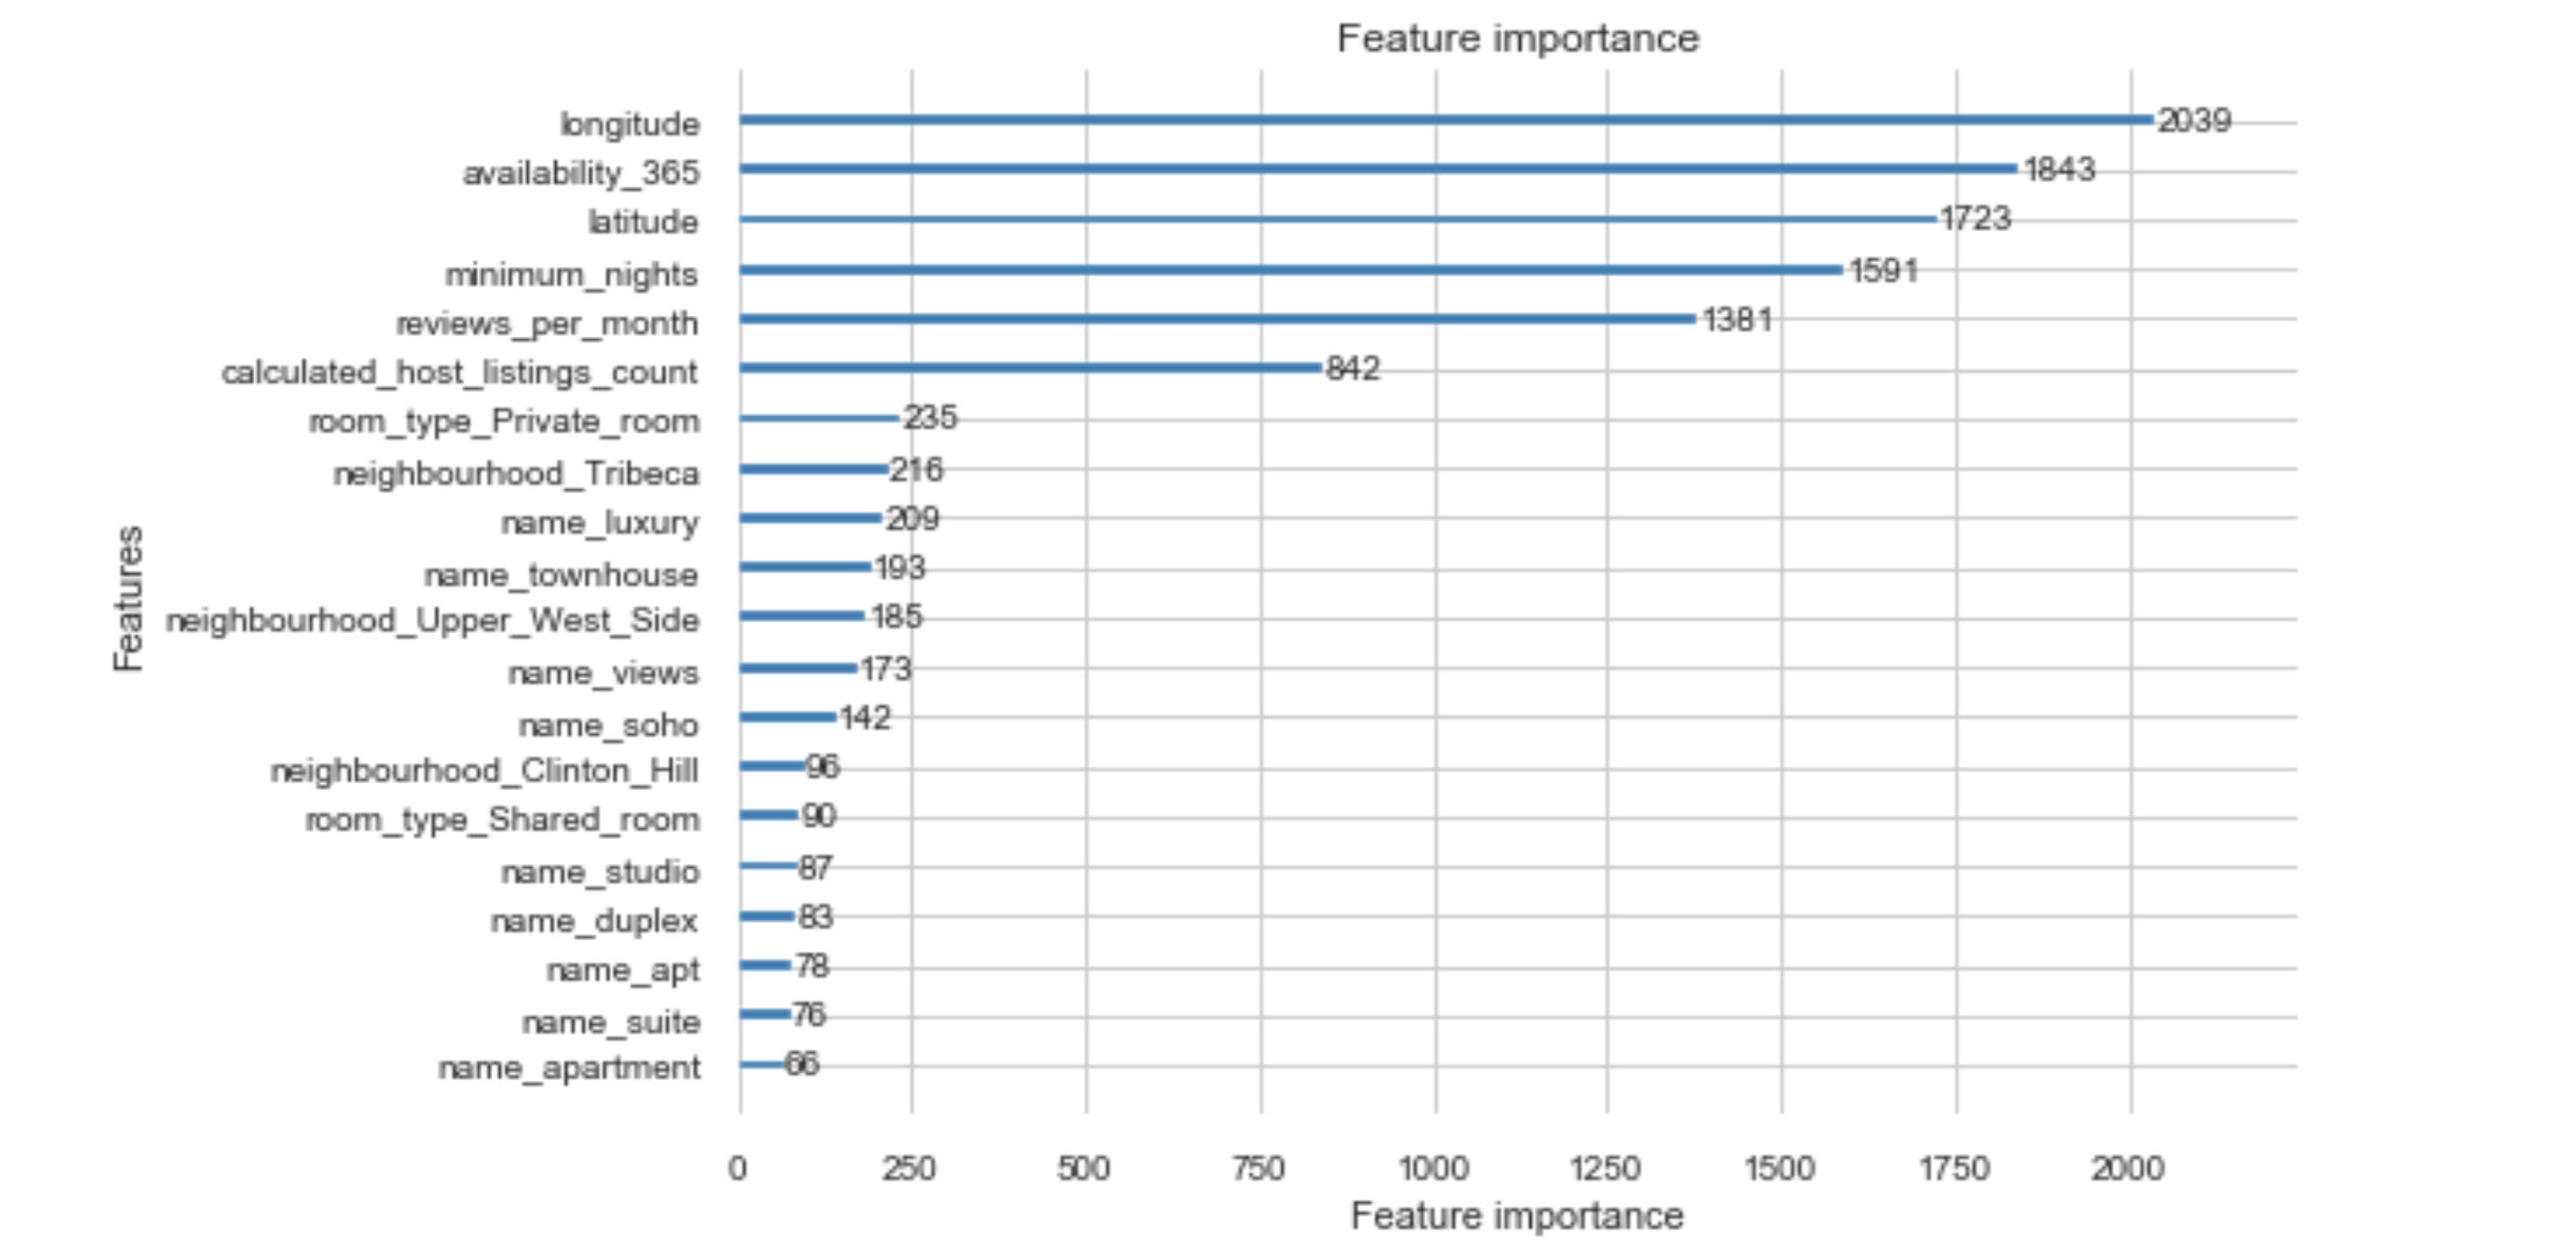

According to the chart above, longitude is the most important feature in price predictions for the best performing model: LGBMRegressor. Therefore, the overly simplistic correlation matrix DID correctly imply the significant relationship between longitude and price (see description of the dataset above). Some interesting things to notice in the above chart are that the number of days in the year that the listing was available also signficiantly determines price, suggesting that either a high availability means that the price of the listing is high and is the reason why people do not book because the price is signficantly high compared to prices in the same neighbourhood or that a low availability means that there is a high demand for the listing making it frequently booked throughout the year. This high demand could also be correlated to a lower price (unless it is a luxury Airbnb destination). This information can help decision-makers such as policy-makers and economist, who may be interested in the provided data for their own purposes, to predict price changes in the future. For instance, in the latter case, due to the high demand, the price of that listing would follow an upward trend to reduce the demand (due to limited staffing capacities) or to increase profits (in the case of a luxury Airbnb destination). The host being another stakeholder, can also choose to decrease price of their listing so as to make it more frequently booked (if he/she sees that the listing has shown high availability and less occupancy throughout the year). This relationship also illustrates the dual-nature of the feature correlation because not only can availability affect prices, but prices can also affect availability. Perhaps we can use the other model (although more poor performing i.e. HuberRegressor), to get an idea of the direction of impact on price for each feature:


![huber_feature_coefficients.png](./huber_feature_coefficients.png)
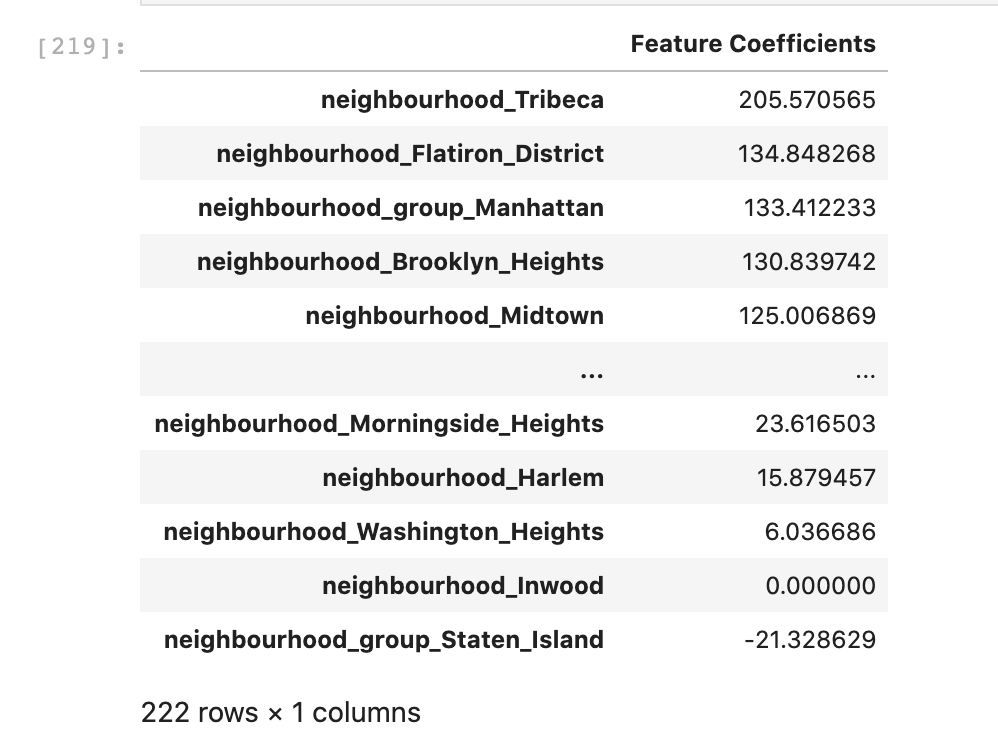

Based on the above feature coefficients, it lists the neighbourhoods in the city that yield higher or lower prices and to what magnitude precisely in the dollar amount, the price would change if the Airbnb listing was in a particular neighbourhood. The price changes are based on switching from a "reference" category `neighbourhood_Inwood` to any of the other neighbourhoods. So, going from neighbourhood_Inwood to neighbourhood_Tribeca would produce a price increase of 206 dollars on average and from Inwood to Flatiron_District would increase the price by 134 (see figure). With a quick google search, we wanted to test our findings against real-estate prices for the neighbourhood `Tribeca` in recent years to confirm that it is realistically reasonable that Airbnb listings there are of much greater price than a neighbourhood like `Inwood`. A post from the platform '6sqft' compared NYC neighbourhood prices in 2018 and Tribeca was at the top of the chart with a median sale price of 3,575,000. You can read the article [here](https://www.6sqft.com/despite-a-30-percent-drop-in-sales-prices-tribeca-remains-nycs-most-expensive-neighborhood/). In addition, the neighbourhood `Flatiron_District` was not far behind in median real-estate sale prices, which is also the case in the above feature coefficients. This shows that our model's predictions are, after all, not too inaccurate in the sense that it is able to capture the price trends in different neighbours and suggest to what magnitude and in what direction each neighbourhood can impact the price per night.

Another interesting analysis is to see how one unit increase in a numeric value like `reviews_per_month` or number of listings of the host can impact the price. This analysis is shwon in the table below:

![price_change_per_numeric_feature_unit.png](./price_change_per_numeric_feature_unit.png)
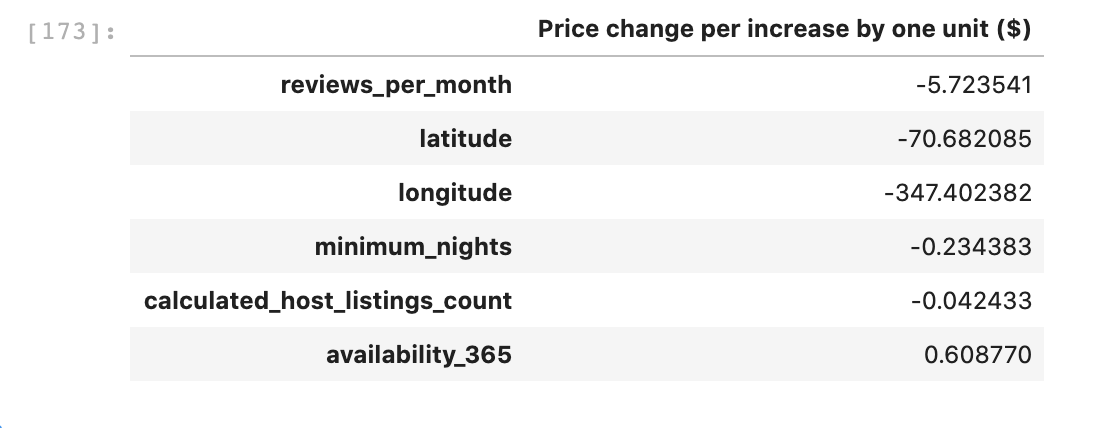

The above figure suggests that for every extra review per month by one person, the price of an Airbnb listing reduces by 5.72 on average. Intuitevly, the more that a listing is reviewed, the more information guests have on their hands to decide whether or not to choose that listing for their stay, which would increase the price. However, a limitation of this dataset is that we do not know whether the reviews are positive or negative. The negative coefficient (adjusted for scaling) for `reviews_per_month` suggests to us that the reviews for a listing were on average negative, which is why it may have negatively impacted the demand, and thus, lowered the price. On the other hand, the number of listings by the host of a specific listing has minimal impact on price change (~0.042) on the negative direction. Lastly, the large magnitude of price change correlated with latitude and longitude, in the negative direction, is also supported by the first model shown on this report (i.e. LGBMRegressor) because that model also highlights these two features to be in the top three important features (look at feature importance chart above). Therefore, the two good performing models suggest similar findings in terms of affect of location on the price.

Ofcourse, the above analysis is based on speculation of the feature importances/coefficients alone. Yet, ML models as such are a more data-driven analytical approach, as opposed to mere speculation, to making high-level decisions. Such an ML model is an attempt to provide the stakeholder (i.e. host) a way to make a concrete and calculated decision, involving price change or regulation, based on current market trends of Airbnb listings in the city in question. 

Although our machine learning model can be useful in predicting price for an Airbnb listing by a new host, as can be seen in the new predicted price above or even that our model highlights which features, whether physical such as room-type or in the Airbnb post such as words used in the Title, are important and positively or negatively correlated to the price, it is very important to bare in mind that our ML model is only 24% accurate in its predictions. This  implies that the model is a VERY POOR representation of the real-world New York Airbnb listings market prices. This further necessitates that the price predictions are also only about ~24% accurate; the model's prediction should not be the only factor taken into account by a host in making a decision on the price of his/her Airbnb listing.

5) Limitations and caveats:
- Our best performing model performs poorly, thus indicating that perhaps the parameters should have been tuned more rigorously or that our features should have been preprocessed in a format that is more intepretable by our model (such as log-transforming the targets). Even more, the model does not take into account price trends, inflation and currency exchange rates in the USA economy or even temporal changes in prices (over time) to make price predictions, which is yet another reason justfiying its poor performance. Perhaps using an Ensemble of models, each taking into account each of these different dynamic factors on a regular basis, can gradually improve the model's performance. After all, feeding data from multiple domains used to train an ensemble of models is key to improving the usefuleness of these ML models in making predictions. However, this is a good start for a model that can undergo further training (given more data) and make more accurate predictions in the future. The performance would once again can be analyzed using the aforementioned scoring metric.
- In terms of performance in training vs. testing sets, our most performant model scored higher on the training set as compared to the testing set (look at table on summary of model performances above). The difference in score is ~0.2 between training and testing sets. This suggests that our performant model overfit to the training set. So why must we be worried about overfitting in our specific case? If the model overifts, it does not generalize well enough to accurately predict to new incoming examples of airbnb listings provided. This is costly to our host because when they want to use the model to determine what price to set for their listing, the price would be inaccurate and not an optimal price to maximize profits. This can be detrimental as the host is losing financial gains that can otherwise be gained by setting the price right to attract the optimal number of guests (based on staffing capacity, availability and demand in the neighbourhood). Even worse, if the predicted price is underestimated by the model, the host can otherwise make more profit if he/she had set the price higher. Lastly, overfitting also means that the importance of the features provided by the model are inaccurate and thus, existing hosts cannot properly determine what adjustments or improvements to make to their physical listing or post to once again, influence a price increase and maximize profits.

- Our models are only limited to making price predictions for one platform, namely Airbnb and in only one city in the world, namely New York based on average market prices in new york, which is a very narrow and specialized market! Therefore, it is not very generalizable to market trends and prices in other cities in the USA. Neither can this model be deployed to other cities nor can it be used for price predictions in say, real-estate or other platforms providing temporary accomodation solutions like Airbnb.
- Our models did not take into account features such as `last_review`, `number_of_reviews` or `host_name`, which despite the high cardinality, could have been used by the model (assuming the features are preprocessed and scaled correctly), in order to make more accurate price predictions. Intuitively, it does seem as though both `host_name` and `number_of_reviews` can potentially influence the price of a listing. For instance, it would be very facinating to see what host names are more associated with higher/lower prices or to get an idea of which hosts in New York own the highest priced Airbnb listings!
- The downside of the feature importances produced by the best perfoming model is that it does not indicate the direction of the signficiance of a feature in price changes (i.e. whether prices go up or down with an increase or decrease in a corresponding feature). Therefore, an existing host (the key stakeholder), cannot directly see which listing features to improve or reduce to bump up listing prices. After all, the goal of these hosts would be to increase the price of their listing in order increase financial gains!
- Another major downside is that stakeholders like hosts may base the price decision and other decisions (such as name used for the listing or minimum number of nights or even availability in a year) primarily on the model's predictions. This decision making approach is flawed. The above speculations, despite them being signficantly data-driven approaches, are after all, only speculations on what COULD happen to price given changes in listing's physical characteristics or the characteristics of the post on Airbnb. What this means is that it would be a logical mistake to infer causation from correlation, a common problem encountered worldwide in the field of data analysis. In our case, hosts may wrongly infer that a listing located in a higher corresponding longiude CAUSES the price to go lower because maybe a higher longitude means that firstly, the location is further away from the ocean and because humans like nature and living by oceansides/the coast, the prices would HAVE TO go lower with higher longitudes. This statement inference is iinaccurate because there may exist Airbnb listings further away from the ocean (i.e. higher longitude), which may still have higher prices due to the luxury services offered as part of the Airbnb package. This is one of many examples highlighting that a correlation between two features in some direction may not always mean that all listings (or data points in other datasets) follow the same trend. That being said, hosts SHOULD NOT take the model's price predictions and feature importances as the 'end truth' in the decision-making process.